##  k- means clutering


### K-Means Clustering

K-Means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct, non-overlapping subsets (or clusters). The algorithm works as follows:

1. **Initialization**: Select K initial centroids randomly from the dataset.
2. **Assignment**: Assign each data point to the nearest centroid, forming K clusters.
3. **Update**: Calculate the new centroids as the mean of all data points assigned to each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change significantly or a maximum number of iterations is reached.

The goal of K-Means clustering is to minimize the within-cluster variance, which is the sum of squared distances between each data point and its corresponding centroid.

K-Means clustering is widely used in various applications such as market segmentation, image compression, and pattern recognition.



!["kemans"](km.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
x= df[['age','fare']]
x

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [4]:
#sclaed data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [-0.25482473, -0.04438104],
       [ 0.15850313, -0.49237783]])

In [6]:
# remove missing value from x_scaled data by mean value
x_scaled=pd.DataFrame(x_scaled,columns=['age','fare'])
x_scaled=x_scaled.fillna(x_scaled.mean())







In [7]:
#perform clutering
kmeans=KMeans(n_clusters=3,random_state=123)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=123)

In [8]:
df['cluster']=kmeans.labels_

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [10]:
df['cluster'].value_counts()

cluster
0    661
2    197
1     33
Name: count, dtype: int64

In [13]:
df['cluster'].unique()

array([0, 2, 1], dtype=int32)

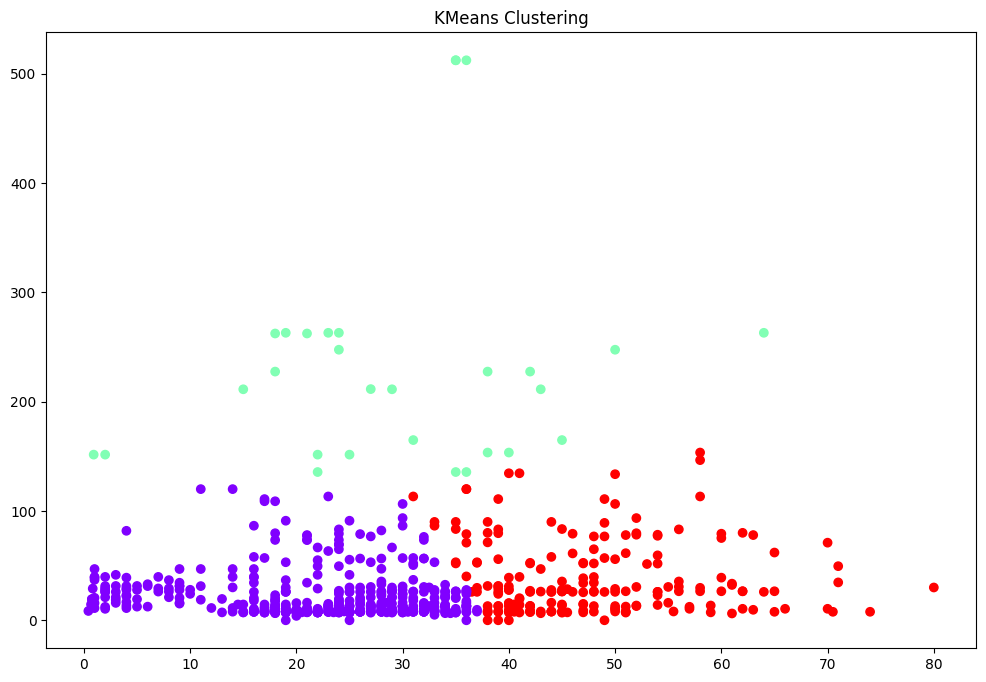

In [23]:
# plot cluster
plt.figure(figsize=(12,8))
plt.scatter(df['age'],df['fare'], c=df['cluster'], cmap='rainbow')
plt.title('KMeans Clustering')
plt.show()

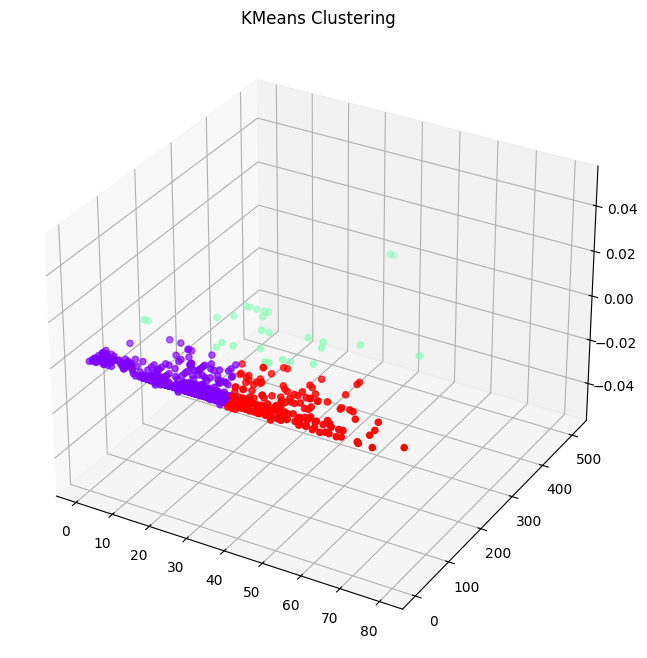

In [24]:
# pot to show in 3D
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['fare'],c=df['cluster'],cmap='rainbow')
ax.set_title('KMeans Clustering')
plt.show()


In [27]:
import plotly.express as px
fig=px.scatter(df,x='age',y='fare',color='cluster')
fig.show()

In [29]:
import plotly.express as px
fig=px.scatter_3d(df,x='age',y='fare',z='pclass',color='cluster')
fig.show()

In [30]:
fig=px.parallel_coordinates(df,color='cluster',title='KMeans Clustering')
fig.show()